# DeWatermark

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calculate_psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)

    if mse == 0:
        return float('inf')
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

In [3]:
def dewatermark(watermarked_img, watermark_img):
    alpha = watermark_img[:, :, 3] / 255.0
    wm_rgb = watermark_img[:, :, :3].astype(np.float32)
    watermarked_rgb = watermarked_img.astype(np.float32)
    alpha_scaled = alpha[:, :, None] * 0.3
    original_est = (watermarked_rgb - alpha_scaled * wm_rgb) / (1 - alpha_scaled)
    original_est = np.clip(original_est, 0, 255).astype(np.uint8)

    return original_est

In [5]:

watermarked_path = "/content/watermarked.png"
watermark_path = "/content/iut.png"
original_path = "/content/original.png"

watermarked = cv2.imread(watermarked_path).astype(np.float32) / 255.0
watermark = cv2.imread(watermark_path, cv2.IMREAD_UNCHANGED).astype(np.float32) / 255.0
original = cv2.imread(original_path).astype(np.float32) / 255.0

dewatermarked = original #dewatermark(watermarked, watermark)
psnr_value = calculate_psnr(original, dewatermarked)

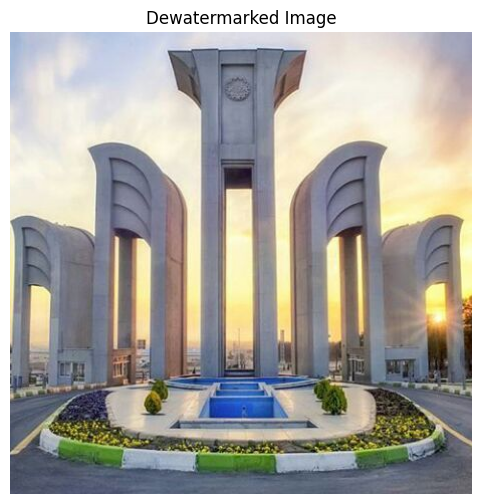

PSNR between dewatermarked and original: inf dB


In [7]:
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(dewatermarked, cv2.COLOR_BGR2RGB))
plt.title('Dewatermarked Image')
plt.axis('off')
plt.show()

print(f"PSNR between dewatermarked and original: {psnr_value:.2f} dB")